In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("CC GENERAL.csv")

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df2 = df[['BALANCE', 'PURCHASES', 'PURCHASES_FREQUENCY', 'CREDIT_LIMIT']]

In [6]:
df2.isnull().sum()

BALANCE                0
PURCHASES              0
PURCHASES_FREQUENCY    0
CREDIT_LIMIT           1
dtype: int64

In [7]:
df2.dropna(inplace=True)

<ipython-input-7-f66736151044>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)


In [9]:
# Agglomerative Hierarchical Clusturing

from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels = model.fit_predict(df2)

In [135]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative.value_counts()

3    6686
1    1868
4      60
0      18
2       4
dtype: int64

In [136]:
agglomerative = pd.DataFrame(clust_labels)

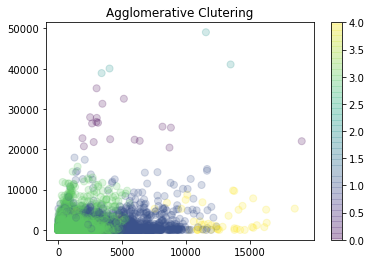

In [137]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (df2['BALANCE'] , df2["PURCHASES"] , c= agglomerative[0], s=50, alpha=0.2)

ax.set_title("Agglomerative Clutering")
plt.colorbar(scatter)

In [139]:
import scipy.cluster.hierarchy as shc

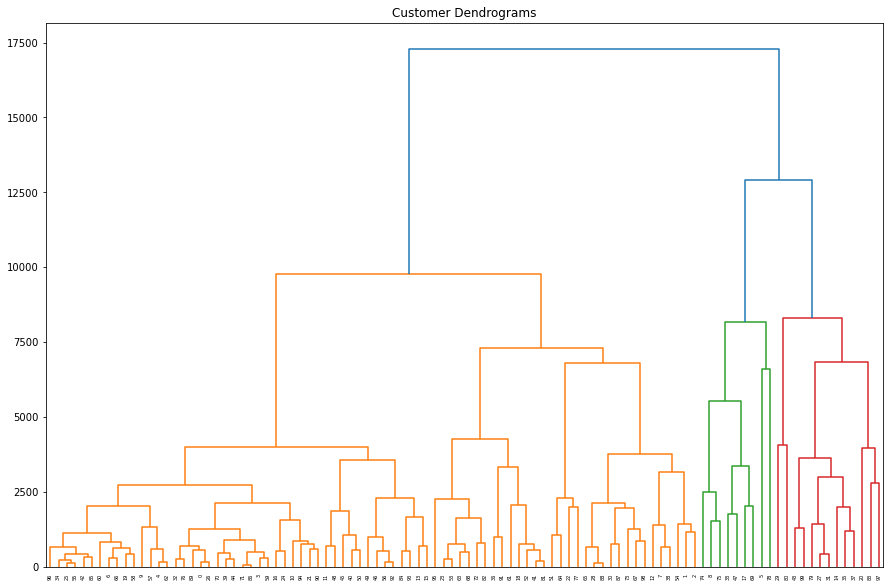

In [146]:
plt.figure(figsize=(15,10))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(df2[:100], method="complete"))

In [11]:
# Now I will apply K-means algorithm and Elbow method to find optimal 'K'

# K-means
from sklearn.cluster import KMeans  
kmeans=KMeans(n_clusters=5, random_state=0) 
kmeans.fit(df2)

KMeans(n_clusters=5, random_state=0)

In [40]:
labels=pd.DataFrame(kmeans.labels_)
df2['Clusters'] = labels
df2.dropna(inplace = True)

<ipython-input-40-d9b7a7bfce65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Clusters'] = labels
<ipython-input-40-d9b7a7bfce65>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace = True)


In [34]:
df2.Clusters.nunique()

5

In [35]:
df_0 = df2[df2.Clusters==0]
df_1 = df2[df2.Clusters==1]
df_2 = df2[df2.Clusters==2]
df_3 = df2[df2.Clusters==3]
df_4 = df2[df2.Clusters==4]

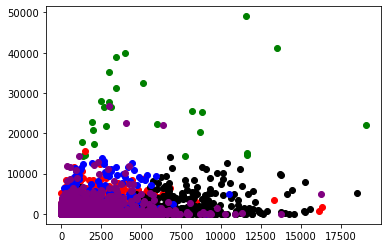

In [36]:
plt.scatter(df_0['BALANCE'] , df_0["PURCHASES"], color='green')
plt.scatter(df_1['BALANCE'] , df_1["PURCHASES"], color='red')
plt.scatter(df_2['BALANCE'] , df_2["PURCHASES"], color='black')
plt.scatter(df_3['BALANCE'] , df_3["PURCHASES"], color='blue')
plt.scatter(df_4['BALANCE'] , df_4["PURCHASES"], color='purple')

In [41]:
# The data values are very densed

In [43]:
# Elbow method to select the best K
rng = range(1,15)
Sum_Squared_Error = []
for k in range(1,15):
    km = KMeans(n_clusters=k)
    km = km.fit(df2)
    Sum_Squared_Error.append(km.inertia_)
Sum_Squared_Error

[198092676120.21722,
 105702530414.70798,
 80703260963.99461,
 65657840225.98794,
 56301499047.45561,
 48665981242.35439,
 42148901642.14967,
 37272941699.801414,
 34159859273.48368,
 31163462785.45458,
 28632932735.13486,
 26489318285.753468,
 25107243091.265682,
 23921390509.95458]

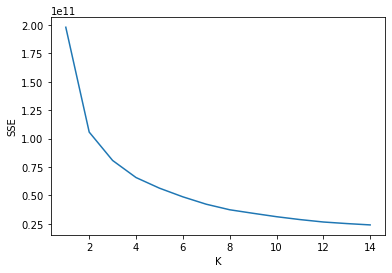

In [44]:
# Plotting the elbow

plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(rng, Sum_Squared_Error)

In [45]:
# The most optimal K seems to be number 4

In [46]:
kmeans=KMeans(n_clusters=4, random_state=0) 
kmeans.fit(df2)

KMeans(n_clusters=4, random_state=0)

In [47]:
labels=pd.DataFrame(kmeans.labels_)
df2['Clusters'] = labels
df2.dropna(inplace = True)

<ipython-input-47-d9b7a7bfce65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Clusters'] = labels
<ipython-input-47-d9b7a7bfce65>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace = True)


In [49]:
df2.head()

,BALANCE,PURCHASES,PURCHASES_FREQUENCY,CREDIT_LIMIT,Clusters
0,40.900749,95.40,0.166667,1000.0,0.0
1,3202.467416,0.00,0.000000,7000.0,1.0
2,2495.148862,773.17,1.000000,7500.0,1.0
3,1666.670542,1499.00,0.083333,7500.0,1.0
4,817.714335,16.00,0.083333,1200.0,0.0


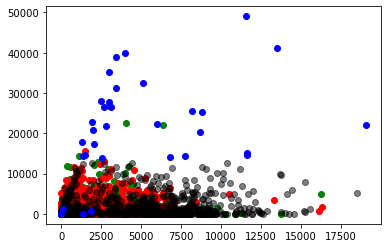

In [53]:
df_0 = df2[df2.Clusters==0]
df_1 = df2[df2.Clusters==1]
df_2 = df2[df2.Clusters==2]
df_3 = df2[df2.Clusters==3]

plt.scatter(df_0['BALANCE'] , df_0["PURCHASES"], color='green')
plt.scatter(df_1['BALANCE'] , df_1["PURCHASES"], color='red')
plt.scatter(df_2['BALANCE'] , df_2["PURCHASES"], color='black', alpha = 0.5)
plt.scatter(df_3['BALANCE'] , df_3["PURCHASES"], color='blue')

In [54]:
# With K = 4 according to the Elbow method, we seem to have a better distribution
# But the data is very condensed and the density is high